In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from geopy.distance import vincenty
from geopy.distance import great_circle
from sklearn import linear_model
from scipy.spatial import distance
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn import svm
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from scipy.sparse import csr_matrix
import xgboost as xgb
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import LeaveOneGroupOut
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn import tree
from sklearn import preprocessing

In [5]:
# Create a random dataset
rng = np.random.RandomState(26)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))

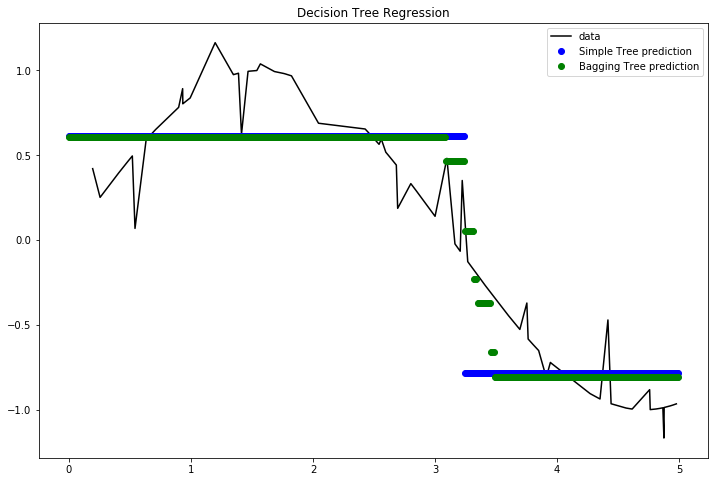

In [6]:
n_estimators = 10  # L in the text
tree_max_depth = 10
bagging_max_depth = 10


# TODO define the regressor by bagging stumps
def ReturnModel(L):
    TreeSimple = tree.DecisionTreeRegressor(max_depth=L)
    TreeBagging = tree.DecisionTreeRegressor(max_depth=L)
    return TreeSimple, TreeBagging

# avec une profondeur de 1
TreeSimple, TreeBagging = ReturnModel(1)
TreeSimple.fit(X, y)


bagging = BaggingRegressor(TreeBagging, random_state=26)
bagging.fit(X, y)
# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = TreeSimple.predict(X_test)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, c="k", label="data")
plt.plot(X_test, y_tree, 'o', c="blue", label="Simple Tree prediction")
plt.plot(X_test, y_bagging, 'o', c="green", label="Bagging Tree prediction")

# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

### 2 eme question

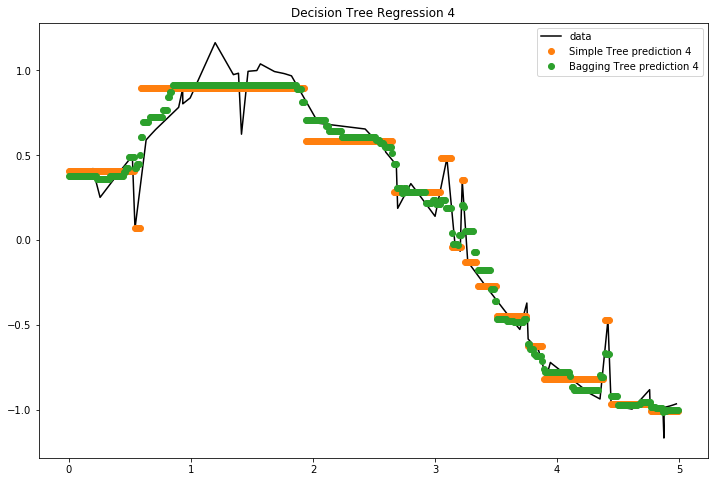

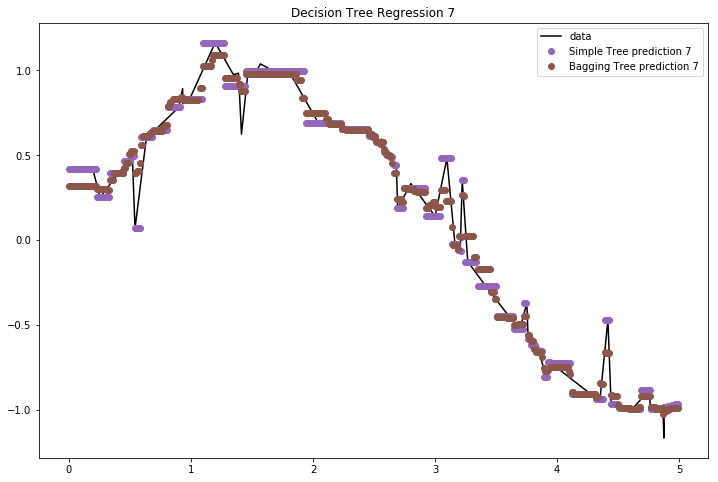

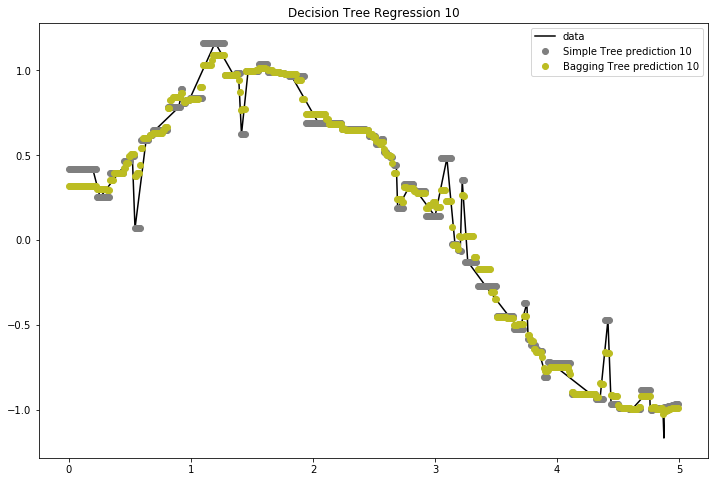

In [7]:
# plot en faisant varier la profondeur

TreeSimple = [None] * 4
TreeBagging = [None] * 4
bagging = [None] * 4

for i in range(1, 4):
    TreeSimple[i], TreeBagging[i] = ReturnModel(3 * i + 1)
    TreeSimple[i].fit(X, y)
    bagging[i] = BaggingRegressor(TreeBagging[i], random_state=26)
    bagging[i].fit(X, y)
# Predict
    y_tree = TreeSimple[i].predict(X_test)
    y_bagging = bagging[i].predict(X_test)
# Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(X, y, c="k", label="data")
    plt.plot(X_test, y_tree, 'o', c="C" + str(3 * i - 2),
             label="Simple Tree prediction " + str(3 * i + 1))
    plt.plot(X_test, y_bagging, 'o', c="C" + str(3 * i - 1),
             label="Bagging Tree prediction " + str(3 * i + 1))

# TODO add plots for Bagging/Tree
    plt.title("Decision Tree Regression " + str(3 * i + 1))
    plt.legend(loc=1, numpoints=1)
    plt.show()

### On voit donc que la profondeur L regle la complexité du modéle.

### Question Numéro 3

### Le fait que les arbres de bagging soient biaisés car ils sont construits à partir d'échantillon bootstrap ne reproduisant pas la meme loi que celle de l'échantillon initial. Le fait d'agreger plusieurs predicteur et d'en faire une moyenne réduit fortement la variance du modèle en 1/sqrt(n))

### Question Numéro 4

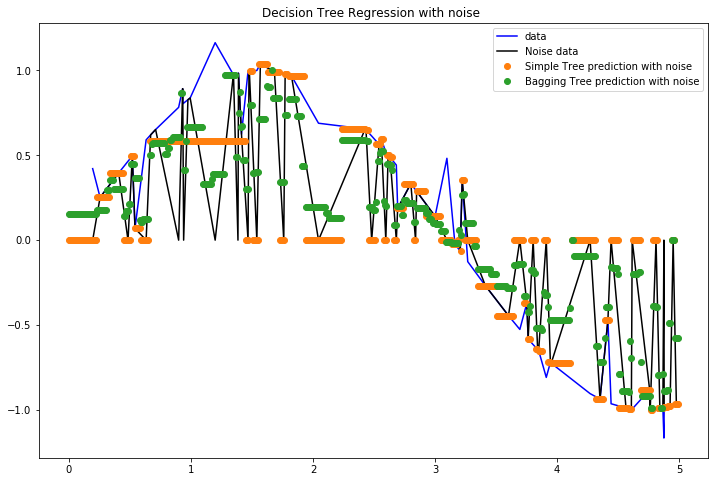

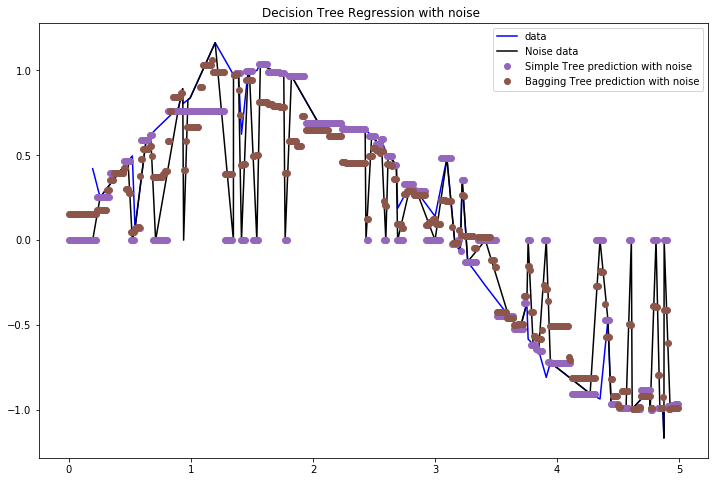

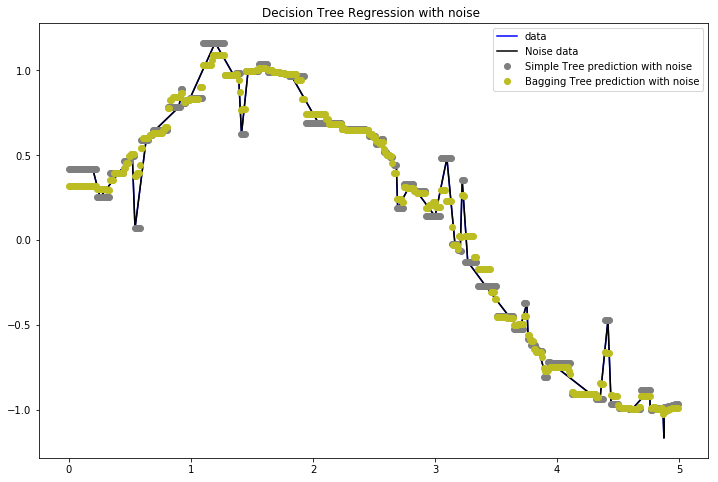

In [8]:
# bruit

for i in range(1, 4):
    ybruit = y.copy()
    ybruit[0::i + 2] = y[0::i + 2] * (1 + np.random.randint(low=-1, high=1))
    TreeSimple[i], TreeBagging[i] = ReturnModel(10)
    TreeSimple[i].fit(X, ybruit)
    bagging[i] = BaggingRegressor(TreeBagging[i], random_state=26)
    bagging[i].fit(X, ybruit)
# Predict
    y_tree = TreeSimple[i].predict(X_test)
    y_bagging = bagging[i].predict(X_test)
# Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(X, y, c="b", label="data")
    plt.plot(X, ybruit, c="k", label="Noise data")
    plt.plot(X_test, y_tree, 'o', c="C" + str(3 * i - 2),
             label="Simple Tree prediction with noise")
    plt.plot(X_test, y_bagging, 'o', c="C" + str(3 * i - 1),
             label="Bagging Tree prediction with noise")

    plt.title("Decision Tree Regression with noise ")
    plt.legend(loc=1, numpoints=1)
    plt.show()

### On voit bien que le decision tree est très sensible au bruit, le bagging réduit un peu ce phenomene grace à la moyenne


### Question numéro 5

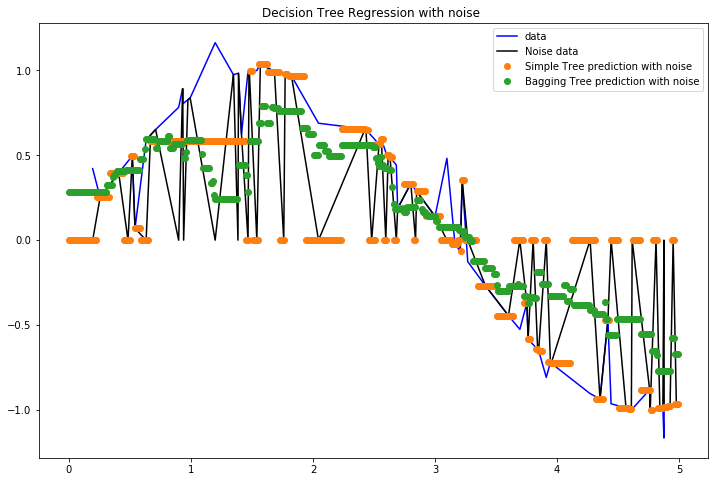

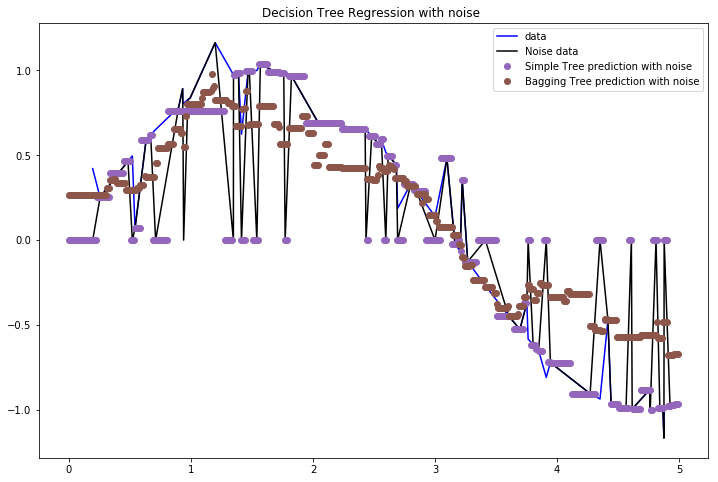

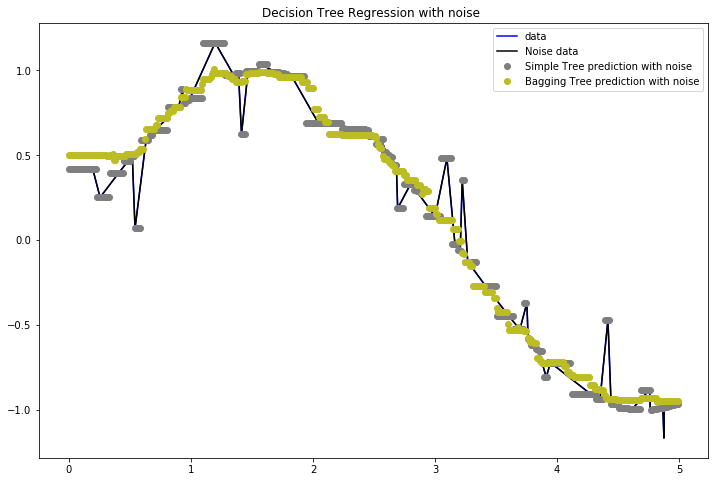

In [9]:
# Avec sous echantillonnage sans remise
# bruit


for i in range(1, 4):
    ybruit = y.copy()
    ybruit[0::i + 2] = y[0::i + 2] * (1 + np.random.randint(low=-1, high=1))
    TreeSimple[i].fit(X, ybruit)
    bagging[i] = BaggingRegressor(
        TreeBagging[i], random_state=26, bootstrap=False, max_samples=0.2)
    bagging[i].fit(X, ybruit)
# Predict
    y_tree = TreeSimple[i].predict(X_test)
    y_bagging = bagging[i].predict(X_test)
# Plot the results
    plt.figure(figsize=(12, 8))
    plt.plot(X, y, c="b", label="data")
    plt.plot(X, ybruit, c="k", label="Noise data")
    plt.plot(X_test, y_tree, 'o', c="C" + str(3 * i - 2),
             label="Simple Tree prediction with noise")
    plt.plot(X_test, y_bagging, 'o', c="C" + str(3 * i - 1),
             label="Bagging Tree prediction with noise")

    plt.title("Decision Tree Regression with noise ")
    plt.legend(loc=1, numpoints=1)
    plt.show()

### Ici pour chaque estimateur nous enlevons 20% de l'échantillon, on voit donc que la sensibilité au bruit est bien réduite

### Random Forest

In [10]:
from sklearn.datasets import load_iris
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes
from sklearn.datasets import load_digits


In [11]:
boston = load_boston()
diabetes = load_diabetes()
digits = load_digits()
iris = load_iris()


X_boston = boston.data
y_boston = boston.target
X_diabetes = diabetes.data
y_diabetes = diabetes.target
X_digits = digits.data
y_digits = digits.target
X_iris = iris.data
y_iris = iris.target


scoredigbRF = cross_val_score(
    RandomForestClassifier(), X_digits, y_digits, cv=7, n_jobs=-1)
scoredigbSV = cross_val_score(svm.SVC(), X_digits, y_digits, cv=7, n_jobs=-1)

scoredirisRF = cross_val_score(
    RandomForestClassifier(), X_iris, y_iris, cv=7, n_jobs=-1)
scoredirisSV = cross_val_score(svm.SVC(), X_iris, y_iris, cv=7, n_jobs=-1)

scoredbosbRF = cross_val_score(
    RandomForestRegressor(), X_boston, y_boston, cv=7, n_jobs=-1)
scoredbosSV = cross_val_score(svm.SVR(), X_boston, y_boston, cv=7, n_jobs=-1)

scorediabRF = cross_val_score(
    RandomForestRegressor(), X_diabetes, y_diabetes, cv=7, n_jobs=-1)
scorediabSV = cross_val_score(
    svm.SVR(), X_diabetes, y_diabetes, cv=7, n_jobs=-1)


print("la différence entre la RF et SVM pour diabetes est ",
      scorediabRF - scorediabSV)
print("la différence entre la RF et SVM pour digits est ",
      scoredigbRF - scoredigbSV)
print("la différence entre la RF et SVM pour boston est ",
      scoredbosbRF - scoredbosSV)
print("la différence entre la RF et SVM pour iris est ",
      scoredirisRF - scoredirisSV)

la différence entre la RF et SVM pour diabetes est  [ 0.32537833  0.21861563  0.57126113  0.43056109  0.36222115  0.54014594
  0.36152778]
la différence entre la RF et SVM pour digits est  [ 0.52307692  0.46718147  0.48449612  0.50194553  0.46484375  0.31372549
  0.44047619]
la différence entre la RF et SVM pour boston est  [ 0.72300136  0.80335349  1.42941565  1.89676564  0.77181561  0.62176542
  1.51884693]
la différence entre la RF et SVM pour iris est  [ 0.          0.         -0.04761905  0.         -0.04761905  0.04761905
  0.        ]


### A part pour le dataset iris la RF est beaucoup plus performante pour la regression et classification

### Question numéro 7

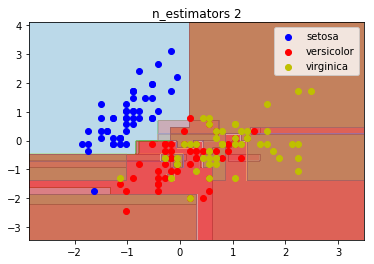

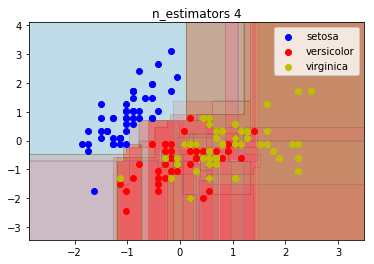

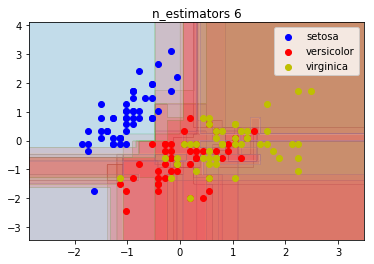

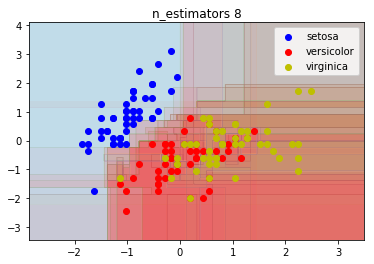

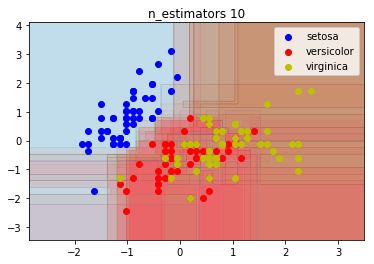

In [12]:
plt.figure(figsize=(17, 17))
# Parameters
for j in range(2, 11, 2):
    n_estimators = j
    plot_colors = "bry"
    plot_step = 0.02

    # Load data
    iris = load_iris()
    X_unscaled, y = iris.data[:, :2], iris.target
    # Standardize
    X = preprocessing.scale(X_unscaled)
    # RF fitting
    model = RandomForestClassifier(n_estimators=n_estimators)
    clf = model.fit(X, y)
    # Plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = np.zeros((xx.shape))
    bigM = np.zeros((xx.shape[0], xx.shape[1] * 2))
    bigM[:, ::2] = xx
    bigM[:, 1::2] = yy
    plt.figure()
    for tree in model.estimators_:
        # TODO use predict to obtain the probabilities you will store in Z
        for i in range(0, xx.shape[1]):
            Z[:, i] = tree.predict(bigM[:, 2 * i:2 * i + 2])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, alpha=1. /
                          n_estimators, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, c in zip(range(3), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],
                    cmap=plt.cm.Paired)
    plt.title('n_estimators ' + str(j))
    plt.legend(scatterpoints=1)
    plt.show()

### Question numéro 8

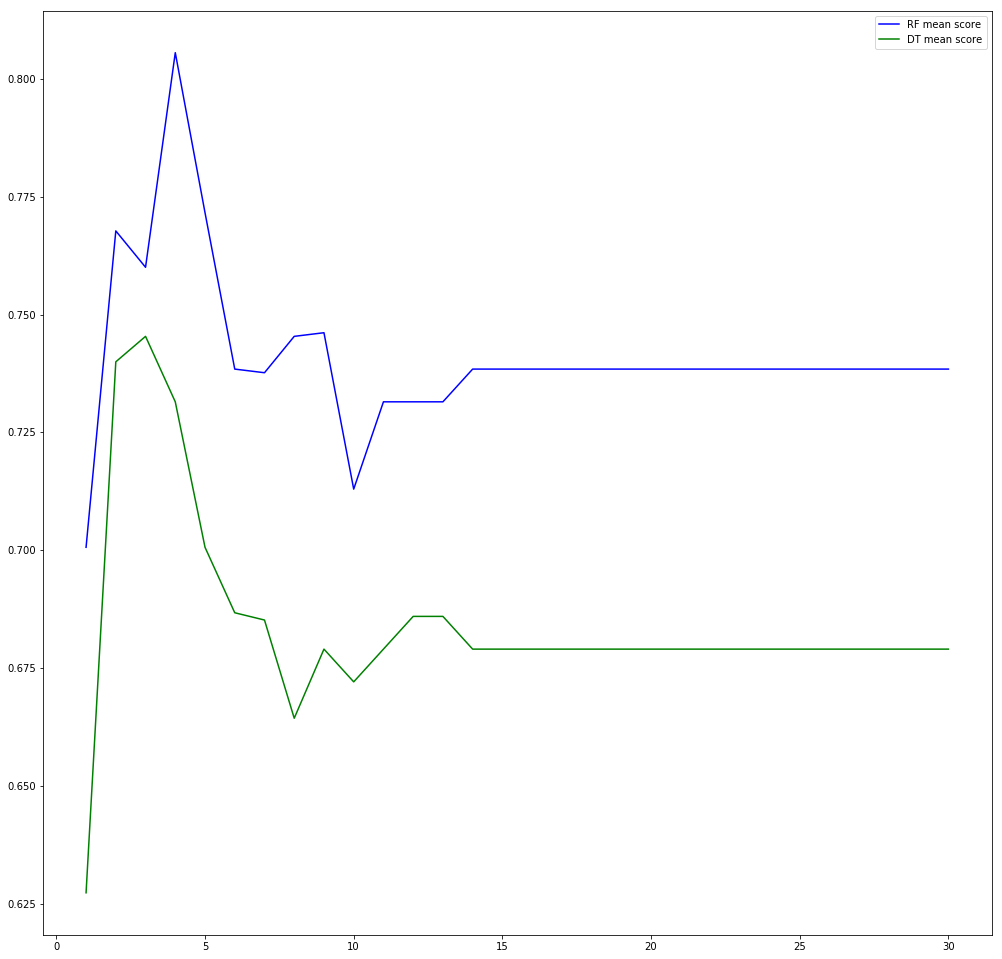

In [14]:
# Comparaison des descisions Tree et RF en CV 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.utils import shuffle
plt.figure(figsize=(17, 17))
Res = np.zeros((30, 2))
X, y = shuffle(X, y, random_state=26)

for i in range(1, 31):
    scoreirisRF = cross_val_score(
        RandomForestClassifier(max_depth=i), X, y, cv=6, n_jobs=-1)
    scoreirisDT = cross_val_score(
        DecisionTreeClassifier(max_depth=i), X, y, cv=6, n_jobs=-1)
    Res[i - 1, 0] = np.mean(scoreirisRF)
    Res[i - 1, 1] = np.mean(scoreirisDT)

plt.plot(range(1, 31), Res[:, 0].ravel(), c='blue', label='RF mean score')
plt.plot(range(1, 31), Res[:, 1].ravel(), c='green', label='DT mean score')
plt.legend()
plt.show()

### On peut remarquer que le score moyen par cross- val 6 fold ne varie plus pour le Random Forest à partir d'une profondeur de 12. Contrairement au DecisionTreeClassifier qui a des sauts et ne reste pas constant pour des arbres complexes. De plus le score de la Random Forest est bien meilleur et bien plus robust à l'overfeet que le DecisionTreeClassifier.


### Question numéro 9

In [16]:

%%latex
\begin{aligned}

E[exp(-Yf(x))|x] = P(Y=1|x)exp[-f(x)] + P(Y=-1|x)exp[f(x)] \\
 \\
\frac{\partial{(E[exp(-Yf(x)]})}{\partial f(x)} = 0 \\
 \\
\frac{\partial{(E[exp(-Yf(x)]})}{\partial f(x)} = -P(Y=1|x)exp[-f(x)] + P(Y=-1|x)exp[f(x)] \\
 \\
=> P(Y=1|x)exp[-f(x)] = P(Y=-1|x)exp[f(x)] \\                            
 \\
Avec \  P(Y=-1|x) = 1 - P(Y=1|x) \\
 \\
=> P(Y=1|x)exp[-f(x)] = (1-P(Y=1|x))exp[f(x)] = exp[f(x)] - P(Y=1|x)exp[f(x)] \\
 \\
=> P(Y=1|x) = exp[2f(x)] - P(Y=1|x)exp[2f(x)] \\
 \\
=> exp[2f(x)] = \frac{P(Y=1|x)}{(1 - P(Y=1|x))}  \\ 
 \\
\mathbf{f°(x)} = \frac{1}{2} \cdot \log((\frac{\eta(x)}{(1 - \eta(x))}))  \\  
                             
\end{aligned}

<IPython.core.display.Latex object>

In [18]:
%%latex

\begin{aligned}\
\ D\ 'après\ la\ question\  précédente\ on\ a: \\
\mathbf{f°(x)} = \frac{1}{2} \cdot \log((\frac{\eta(x)}{(1 - \eta(x))}))  \\  
\mathbf{hexp°(x)}=\mathbf{sign(f°(x))} \\
\mathbf{hexp°(x)}=\ -1\ si\ \eta(x)<=1/2\\
\mathbf{hexp°(x)}=\ 1\ si\ \eta(x)>1/2 \\
\ or\ le\ classifieur\ de\ Bayes:\\
\mathbf{hbayes°(x)}=\mathbf{sign(2\cdot(\eta(x) -1))} \\ 
\mathbf{hbayes°(x)}=\ -1\ si\ \eta(x)<=1/2\\
\mathbf{hbayes°(x)}=\ 1\ si\ \eta(x)>1/2 \\
\ On\ a\ donc\ égalité\ des\ classifieurs. \\
\end{aligned}\

<IPython.core.display.Latex object>

### Question numero 11

In [19]:
%%latex
\begin{aligned}



\arg \ min\ E_{n}[exp(-Y\hat{F}_{m-1}(X))]\exp[-cY\hat{h}_{m}(X)] \\

\ =arg\ min \ [\sum_{i=1}^{N} \ {w}_{i}^{m-1} \ exp[-cy_{i}\hat{h}_{m}(x_{i})]] \\
 

\ =arg\ min \ [exp(-c) * \sum_{y_{i}=h_{m}({x}_i)}^{N} \ {w}_{i}^{m-1} + exp(c) * \sum_{y_{i} \neq h_{m}({x}_i)}^{N} \ {w}_{i}^{m-1}]\\
 
\ =arg\ min \ [exp(-c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} - exp(-c) * \sum_{y_{i} \neq h_{m}({x}_i)}^{N} \ {w}_{i}^{m-1} + exp(c) * \sum_{y_{i} \neq h_{m}({x}_i)}^{N} \ {w}_{i}^{m-1}]\\

\ =arg\ min \ [exp(-c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} + (exp(c) - exp(-c)) * \sum_{y_{i} \neq h_{m}({x}_i)}^{N} \ {w}_{i}^{m-1} ]\\

\ =arg\ min \ [exp(-c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} + (exp(c) - exp(-c)) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)})  ]\\

\ on \ dérive \ cette \ quantité\ par\ rapport \ à\ c \ et\ on \ écrit \ que \ la \ dérivée\ est \ nulle\ ce\ qui\ donne : \\  

\ [-exp(-c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} + (exp(c) + exp(-c)) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)})  ] = 0 \\    
    

\ exp(c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)}) + exp(-c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)}) -exp(-c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1}  = 0 \\

\ on \ multiplie\ cette\ égalité\ par\ exp(c)\ et\ on\ obtient\ alors\ l\ 'égalité\ suivante: \\


\ exp(2c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)}) = \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} - \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)})\\


\ exp(2c) * \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)}) = \sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\ =h_{m}({x}_i)})\\

\ 2c = log(\frac{\sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\ =h_{m}({x}_i)}}{\sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)}}) \\

\ c = (\frac{1}{2})\log(\frac{\frac{1}{n}\sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\ =h_{m}({x}_i)}}{\frac{1}{n}\sum_{{i}=1}^{N} \ {w}_{i}^{m-1} \ \mathbb {1}_({{y}_i\neq h_{m}({x}_i)}}) \\


\ c = (\frac{1}{2})\log(\frac{P_{w}^{m-1}(Y=\hat{h}_{m}(X))}{P_{w}^{m-1}(Y \neq \hat{h}_{m}(X))} ) \\


\end{aligned}

<IPython.core.display.Latex object>

### Question numéro 12

In [22]:
%%latex
\begin{aligned}

\ {\omega}_{i}^{m} \propto  \ {\omega}_{i} ^ {m - 1} \ exp[-c_{m}y_{i}\hat{h}_{m}(x_{i})] \\
\ {\omega}_{i}^{m}\propto \ {\omega}_{i} ^ {m - 1} \ exp[c_{m} \ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_) + -c_{m}(1 -\ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_))] \\

\ {\omega}_{i}^{m}\propto \ {\omega}_{i} ^ {m - 1}\ exp[2c_{m}\ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_) - c_{m}]\\

\ {\omega}_{i}^{m}\propto \frac{\ {\omega}_{i} ^ {m - 1}}{exp[c_{m}]}\ exp[2c_{m}\ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_)]\\

\ Ensuite\ On\ normalise\ la\ somme\ des\ poids: \\

\ Par\ définition\ on\ a:\\
    
\ {\omega}_{0} = {w}_{0} =  \frac{1}{n}  \\
    
\ {w}_{i} ^ {m } \propto \frac{\frac{{\omega}_{i} ^ {m - 1}}{exp[c_{m}]}\ exp[2c_{m}\ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_)]}{\frac{1}{exp[c_{m}]}\sum_{{i}=1}^{N}{\omega}_{i} ^ {m-1}\ exp[2c_{m}\ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_)]}\\

\ {w}_{i} ^ {m } \propto \frac{{\omega}_{i} ^ {m - 1}\ exp[2c_{m}\ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_)]}{\sum_{{i}=1}^{N}{\omega}_{i} ^ {m-1}\ exp[2c_{m}\ \mathbb {1}_(y_{i}\neq h_{m}({x}_i )_)]}\\

\end{aligned}

<IPython.core.display.Latex object>

### Question numéro 13

In [23]:
from sklearn.ensemble import AdaBoostClassifier


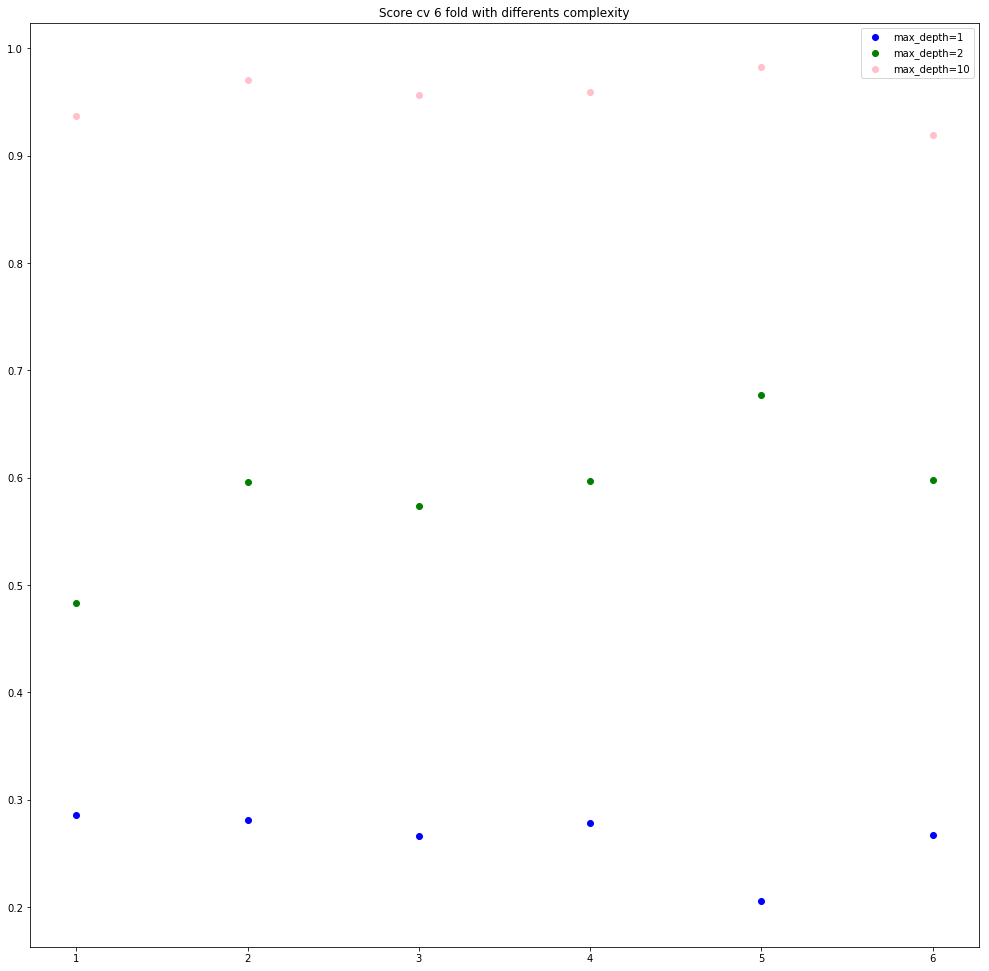

In [24]:
plt.figure(figsize=(17, 17))
clf = []
depth = [1, 2, 10]
score = []

for i in depth:
    clf.append(AdaBoostClassifier(
        base_estimator=DecisionTreeClassifier(max_depth=i)))

for j in range(0, 3):
    score.append(cross_val_score(clf[j], X_digits, y_digits, cv=6, n_jobs=-1))

plt.scatter(range(1, 7), score[0], label='max_depth=1', color='blue')
plt.scatter(range(1, 7), score[1], label='max_depth=2', color='green')
plt.scatter(range(1, 7), score[2], label='max_depth=10', color='pink')
plt.title("Score cv 6 fold with differents complexity")
plt.legend()
plt.show()

### On voit un score bien plus élevé avec une complexité de 10 que pour le decision tree classifier ou meme la random Forest avec la meme complexité

### Question numéro 14

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_digits, y_digits, test_size=0.25, random_state=26)

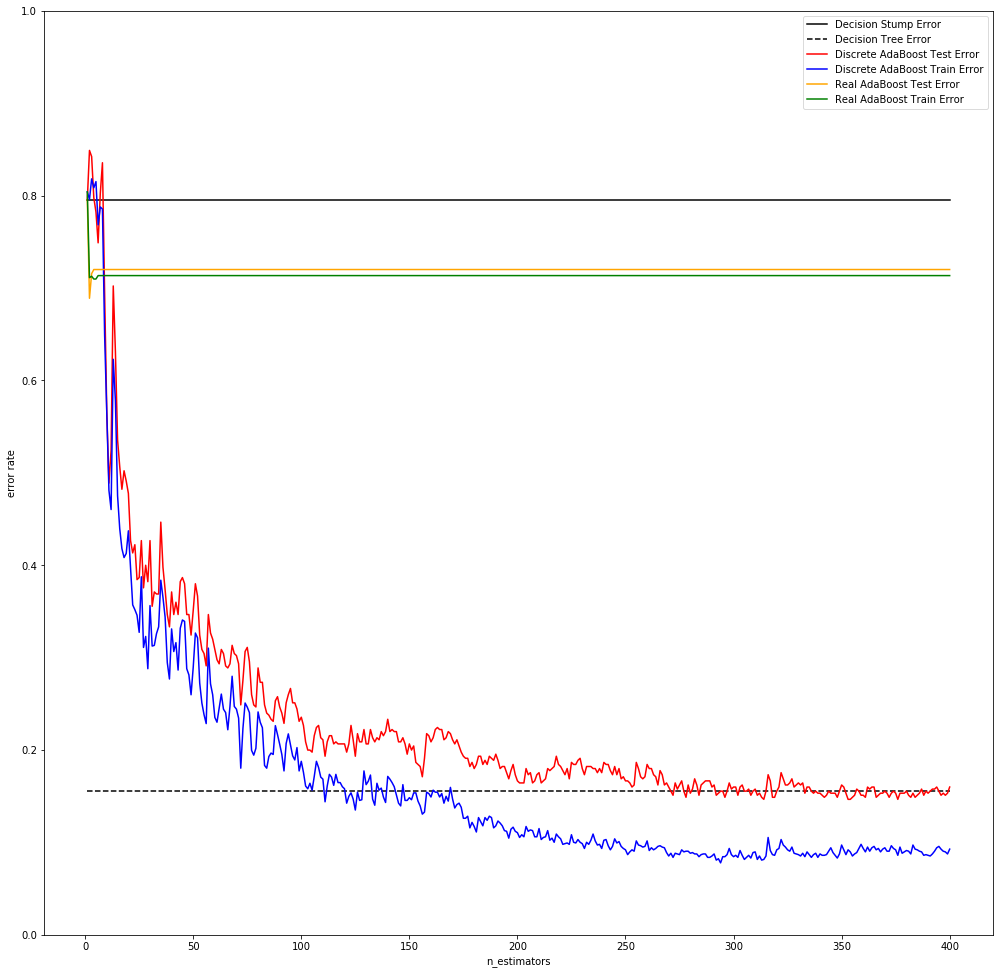

In [26]:
from sklearn.metrics import zero_one_loss
plt.figure(figsize=(17, 17))

n_estimators = 400

dt_stump = DecisionTreeClassifier(max_depth=1, min_samples_leaf=1)
dt_stump.fit(X_train, y_train)
dt_stump_err = 1.0 - dt_stump.score(X_test, y_test)

dt = DecisionTreeClassifier(max_depth=10, min_samples_leaf=1)
dt.fit(X_train, y_train)
dt_err = 1.0 - dt.score(X_test, y_test)

ada_discrete = AdaBoostClassifier(
    base_estimator=dt_stump,
    n_estimators=n_estimators,
    algorithm="SAMME")
ada_discrete.fit(X_train, y_train)

ada_real = AdaBoostClassifier(
    base_estimator=dt_stump,
    n_estimators=n_estimators,
    algorithm="SAMME.R")
ada_real.fit(X_train, y_train)

fig = plt.figure(figsize=(17, 17))
ax = fig.add_subplot(111)

ax.plot([1, n_estimators], [dt_stump_err] * 2, 'k-',
        label='Decision Stump Error')
ax.plot([1, n_estimators], [dt_err] * 2, 'k--',
        label='Decision Tree Error')

ada_discrete_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_test)):
    ada_discrete_err[i] = zero_one_loss(y_pred, y_test)

ada_discrete_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_discrete.staged_predict(X_train)):
    ada_discrete_err_train[i] = zero_one_loss(y_pred, y_train)

ada_real_err = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_test)):
    ada_real_err[i] = zero_one_loss(y_pred, y_test)

ada_real_err_train = np.zeros((n_estimators,))
for i, y_pred in enumerate(ada_real.staged_predict(X_train)):
    ada_real_err_train[i] = zero_one_loss(y_pred, y_train)

ax.plot(np.arange(n_estimators) + 1, ada_discrete_err,
        label='Discrete AdaBoost Test Error',
        color='red')
ax.plot(np.arange(n_estimators) + 1, ada_discrete_err_train,
        label='Discrete AdaBoost Train Error',
        color='blue')
ax.plot(np.arange(n_estimators) + 1, ada_real_err,
        label='Real AdaBoost Test Error',
        color='orange')
ax.plot(np.arange(n_estimators) + 1, ada_real_err_train,
        label='Real AdaBoost Train Error',
        color='green')

ax.set_ylim((0.0, 1.0))
ax.set_xlabel('n_estimators')
ax.set_ylabel('error rate')

leg = ax.legend(loc='upper right', fancybox=True)
leg.get_frame().set_alpha(0.7)

plt.show()

### Question numéro 15

### Si on augmente la complexification des arbres de classifcation on overfeet.

### Question numéro 16

In [164]:
from sklearn.base import BaseEstimator, ClassifierMixin


class OwnAdaBoost(BaseEstimator, ClassifierMixin):

    def __init__(self, base_estimator=DecisionTreeClassifier(), n_estimators=50):
        self.base_estimator = base_estimator
        self.n_estimators = n_estimators

    def fit(self, X, y):

        w = np.ones(len(X)) / X.shape[0]

        self.c = []
        self.estimators = []
        all_zeros = np.zeros((X.shape[0], 1))
        yvector = y.reshape(-1, 1)
        for i in range(1, self.n_estimators + 1):
            missed = np.zeros((X.shape[0], 1))
            unmissed = np.zeros((X.shape[0], 1))
            clf = self.base_estimator.fit(X, y, sample_weight=w)
            y_pred = clf.predict(X).reshape(-1, 1)
            missed[y_pred != yvector] = 1
            unmissed = 1 - missed
            self.estimators.append(clf)
            self.c.append(
                (1 / 2) * np.log(np.dot(w, unmissed.ravel()) / np.dot(w, missed.ravel())))
            wint = np.multiply(w, np.exp(np.multiply(
                2 * self.c[i - 1], missed)).reshape(1, -1))
            w = wint / np.sum(wint)
            w = w.ravel()

        return self

    def predict(self, X):

        predictors = np.asarray([x.predict(X) for x in self.estimators])
        c = np.asarray(self.c)[:, np.newaxis]
        y_pred = np.sign(np.sum(np.multiply(c, predictors), axis=0))
        return y_pred


In [165]:
# We will test on binary clasification (-1,1)
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
Ybc = bc.target
Xbc = bc.data
Ybc[Ybc == 0] = -1
# Standardize
Xbc_scaled = preprocessing.scale(Xbc)
print(Xbc_scaled.shape)

(569, 30)


In [166]:
# Comparaison des deux modèles
ada_discrete = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=400,
    algorithm="SAMME")


ada_real = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=2),
    n_estimators=400,
    algorithm="SAMME.R")

ada_own = OwnAdaBoost(base_estimator=DecisionTreeClassifier(
    max_depth=2), n_estimators=400)

%timeit scoreadadiscrete = cross_val_score(ada_discrete, Xbc_scaled, Ybc, cv=6)

%timeit scoreadareal = cross_val_score(ada_real, Xbc_scaled, Ybc, cv=6)

%timeit scoreadaown = cross_val_score(ada_own, Xbc_scaled, Ybc, cv=6)

7.92 s ± 56.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
8.16 s ± 11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
6.75 s ± 47.8 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [167]:
print('AdaDiscrete: ',scoreadadiscrete)
print('AdaReal: ',scoreadareal)
print('AdaOwn: ',scoreadaown)

AdaDiscrete:  [ 0.97916667  0.95833333  0.97894737  1.          0.9787234   0.9893617 ]
AdaReal:  [ 0.97916667  0.95833333  0.97894737  0.96808511  0.95744681  1.        ]
AdaOwn:  [ 0.75        0.8125      0.92631579  0.59574468  0.92553191  0.89361702]


In [174]:
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(
    Xbc_scaled, Ybc, test_size=0.1, random_state=26)
clf_1 = ada_discrete.fit(X_train, y_train)
clf_2 = ada_real.fit(X_train, y_train)
clf_3 = ada_own.fit(X_train, y_train)

y_pred_1 = clf_1.predict(X_test)
y_pred_2 = clf_2.predict(X_test)
y_pred_3 = clf_3.predict(X_test)

print('confusion matrix for ada Discrete: ', confusion_matrix(y_test, y_pred_1, labels=[-1, 1]))
print('confusion matrix for ada Real: ', confusion_matrix(y_test, y_pred_2, labels=[-1, 1]))
print('confusion matrix for ada own: ', confusion_matrix(y_test, y_pred_3, labels=[-1, 1]))
print('score for ada Discrete: ',clf_1.score(X_test, y_test))
print('score for ada Real: ', clf_2.score(X_test, y_test))
print('score for ada own: ', clf_3.score(X_test, y_test))


confusion matrix for ada Discrete:  [[20  0]
 [ 2 35]]
confusion matrix for ada Real:  [[20  0]
 [ 2 35]]
confusion matrix for ada own:  [[19  1]
 [ 2 35]]
score for ada Discrete:  0.964912280702
score for ada Real:  0.964912280702
score for ada own:  0.947368421053


### On peut remarquer que mon classifieur est patiquement aussi performant que celui de sklearn tout en étant plus rapide. La principale difference étant le nombre de faux négatif prédit 1 contre 0, ce qui peur etre problématique dans le cas du cancer du sein. J'ai comparé les temps sans n_jobs = -1 na sachant pas encore l'implémenter.

In [17]:
%%latex
\begin{aligned}

\ P_{t}(log | Ipexec) = \alpha \sum_{{j=1}}^{k} P_{t}(\log_{j} | Ipapp(j), Ipexec) + \gamma \sum_{{j=1}}^{k} P_{t}(\log_{j} | User(j), Ipexec)  \\

\end{aligned}

<IPython.core.display.Latex object>